<a href="https://colab.research.google.com/github/SNEHA62003/ML_Activity/blob/main/NavieBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # Upload one or more .pgm images manually


Saving Screenshot 2025-05-13 144620.png to Screenshot 2025-05-13 144620.png


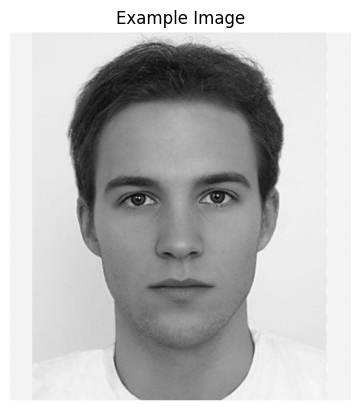

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Use the name of the uploaded file from 'uploaded' dict
uploaded_filename = list(uploaded.keys())[0]  # Get the uploaded file name dynamically

# Open and display the image
img = Image.open(uploaded_filename).convert('L')  # Convert to grayscale

# Show the image in notebook
plt.imshow(np.array(img), cmap='gray')
plt.axis('off')  # Hide axes
plt.title('Example Image')
plt.show()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Images shape: (400, 64, 64)
Labels shape: (400,)


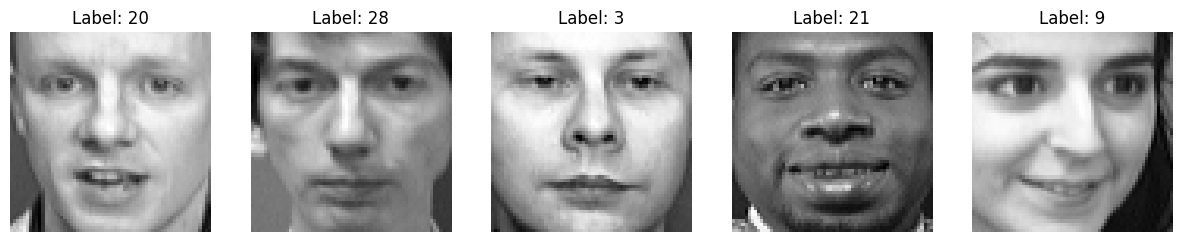

In [3]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42)
images = data.images
labels = data.target

# Check the shape
print("Images shape:", images.shape)  # (400, 64, 64)
print("Labels shape:", labels.shape)  # (400,)

# Save as .npy
np.save('olivetti_images.npy', images)
np.save('olivetti_labels.npy', labels)

# Show 5 random images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Label: {labels[i]}')
    ax.axis('off')
plt.show()


In [4]:
# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [5]:
#Initialize and train the Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
# Reshape the images to 2D arrays
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
nb_classifier.fit(X_train_reshaped, y_train)
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_reshaped)

In [6]:
#Evaluate the model
from sklearn.metrics import accuracy_score

print("=" * 50)
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f} %")
print("=" * 50)

Model Evaluation:
Accuracy: 77.50 %


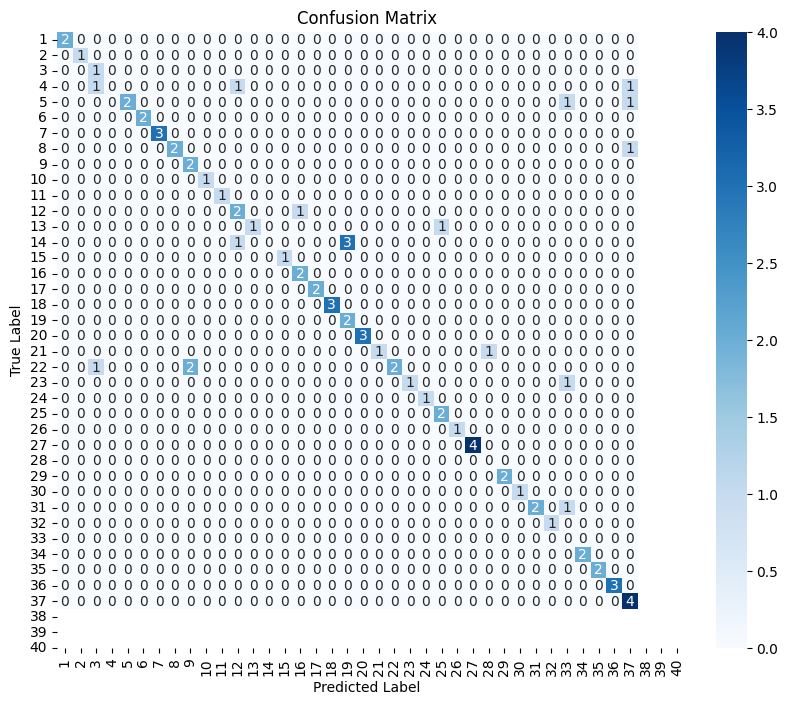

In [7]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(1, 41), yticklabels=np.arange(1, 41))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

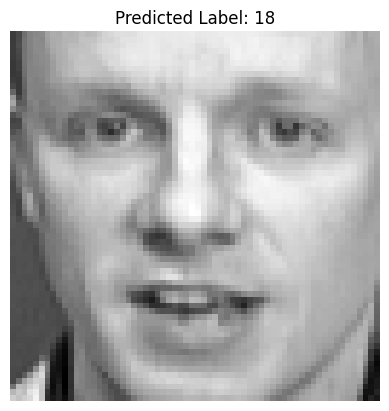

Actual Label: 18


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from PIL import Image

# Step 1: Load the Olivetti Faces dataset from sklearn
olivetti_faces = fetch_olivetti_faces(shuffle=True, random_state=42)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(olivetti_faces.data, olivetti_faces.target, test_size=0.25, random_state=42)

# Step 3: Train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Step 4: Pick a test image to classify
# Use a random image from the test set
test_img_idx = 0  # For example, using the first test image
test_img = X_test[test_img_idx].reshape(1, -1)  # Reshape to match input format of classifier

# Step 5: Predict the label of the test image
predicted_label = nb_classifier.predict(test_img)

# Step 6: Display the test image and its predicted label
plt.imshow(olivetti_faces.images[test_img_idx], cmap='gray')
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label[0]}')
plt.show()

# Print the actual label of the test image (for comparison)
print(f'Actual Label: {y_test[test_img_idx]}')


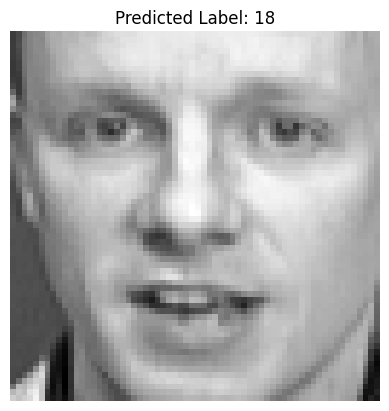

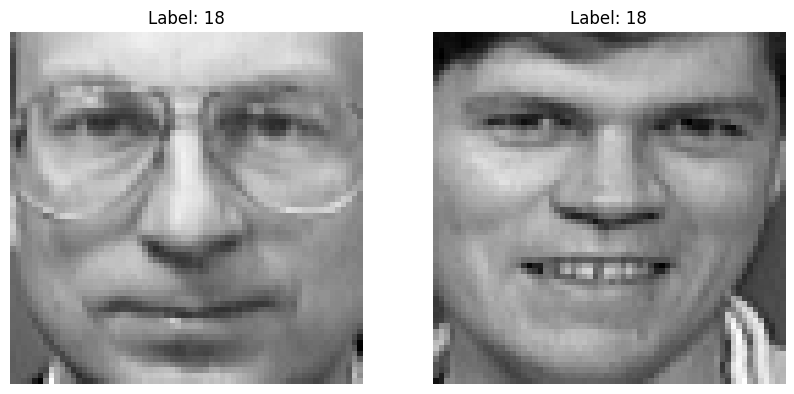

Actual Label: 18


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from PIL import Image

# Step 1: Load the Olivetti Faces dataset from sklearn
olivetti_faces = fetch_olivetti_faces(shuffle=True, random_state=42)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(olivetti_faces.data, olivetti_faces.target, test_size=0.25, random_state=42)

# Step 3: Train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Step 4: Pick a test image from the dataset as a substitute for your own image
# Here, I'm using a random image from the test set
test_img_idx = 0  # Choose any index for the test image (you can change this)
test_img = X_test[test_img_idx].reshape(1, -1)  # Reshape to match input format of classifier

# Step 5: Predict the label of the test image
predicted_label = nb_classifier.predict(test_img)

# Step 6: Display the test image and its predicted label
plt.imshow(olivetti_faces.images[test_img_idx], cmap='gray')
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label[0]}')
plt.show()

# Step 7: Display two random images from the dataset with predicted label
# Get the indices of images with predicted label
indices = np.where(y_train == predicted_label)[0]  # Get indices of training images with predicted label
random_indices = np.random.choice(indices, size=2, replace=False)

# Display the two images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 2, i + 1)
    plt.imshow(olivetti_faces.images[idx], cmap='gray')
    plt.axis('off')
    plt.title(f'Label: {y_train[idx]}')
plt.show()

# Print the actual label of the test image for comparison
print(f'Actual Label: {y_test[test_img_idx]}')


In [10]:
from google.colab import files
uploaded = files.upload()  # Upload one or more .pgm images manually


Saving Screenshot 2025-05-13 144620.png to Screenshot 2025-05-13 144620 (1).png


Saving Screenshot 2025-05-13 144620.png to Screenshot 2025-05-13 144620 (2).png
Uploaded Image: Screenshot 2025-05-13 144620 (2).png


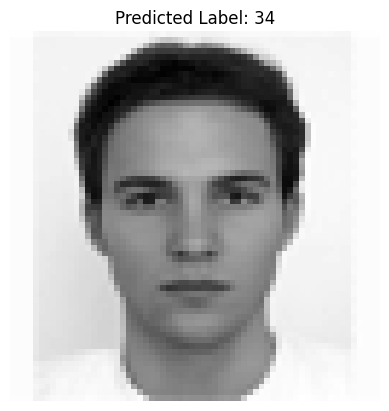

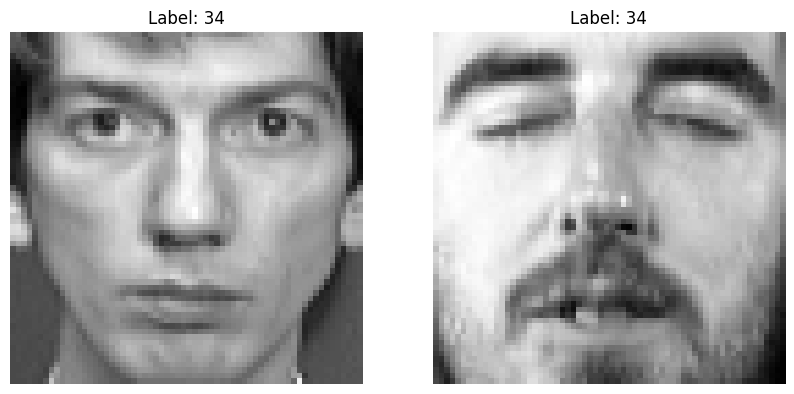

Predicted Label: 34


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from PIL import Image
from google.colab import files

# Step 1: Upload your image (you have already uploaded it)
uploaded = files.upload()

# After upload, find the name of your uploaded file
uploaded_image_name = list(uploaded.keys())[0]  # Get the filename of the uploaded image
print(f"Uploaded Image: {uploaded_image_name}")

# Step 2: Load the Olivetti Faces dataset from sklearn
olivetti_faces = fetch_olivetti_faces(shuffle=True, random_state=42)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(olivetti_faces.data, olivetti_faces.target, test_size=0.25, random_state=42)

# Step 4: Train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Step 5: Load and preprocess your uploaded image (resize to 64x64 pixels)
my_img = Image.open(uploaded_image_name).convert('L')  # Convert to grayscale
my_img = my_img.resize((64, 64))  # Resize to 64x64 pixels (matching dataset)
my_img_array = np.array(my_img)

# Step 6: Reshape your image for prediction (similar to how the dataset is structured)
my_img_reshaped = my_img_array.reshape(1, -1)  # Reshape to 1D array for prediction

# Step 7: Predict the label of your image
predicted_label = nb_classifier.predict(my_img_reshaped)

# Step 8: Display your image and the predicted label
plt.imshow(my_img_array, cmap='gray')
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label[0]}')
plt.show()

# Step 9: Display two random images from the dataset with the predicted label
indices = np.where(y_train == predicted_label)[0]  # Get indices of training images with predicted label
random_indices = np.random.choice(indices, size=2, replace=False)

# Display two random images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 2, i + 1)
    plt.imshow(olivetti_faces.images[idx], cmap='gray')
    plt.axis('off')
    plt.title(f'Label: {y_train[idx]}')
plt.show()

# Print the actual label of your image (for comparison)
print(f'Predicted Label: {predicted_label[0]}')
